# Diabetes Prediction

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [107]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


### Exploratory Data Analysis

In [108]:
df.shape

(100000, 9)

In [109]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [110]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [112]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [113]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,100000,3,Female,58552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,100000.0,NaN,NaN,NaN,41.885856,22.51684,0.08,24.0,43.0,60.0,80.0
hypertension,100000.0,NaN,NaN,NaN,0.07485,0.26315,0.0,0.0,0.0,0.0,1.0
heart_disease,100000.0,NaN,NaN,NaN,0.03942,0.194593,0.0,0.0,0.0,0.0,1.0
smoking_history,100000,6,No Info,35816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,100000.0,NaN,NaN,NaN,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,NaN,NaN,NaN,5.527507,1.070672,3.5,4.8,5.8,6.2,9.0
blood_glucose_level,100000.0,NaN,NaN,NaN,138.05806,40.708136,80.0,100.0,140.0,159.0,300.0
diabetes,100000.0,NaN,NaN,NaN,0.085,0.278883,0.0,0.0,0.0,0.0,1.0


Categorical Features : Gender, Hypertension, Heart Disease, Smoking History<br>
Numerical Features : Age, BMI, HbA1c Level, Blood Glucose Level<br>
We don't have null values

In [114]:
df.duplicated().sum() # Check for duplicates

3854

In [115]:
df = df.drop_duplicates()

In [116]:
df.shape

(96146, 9)

### Target Feature

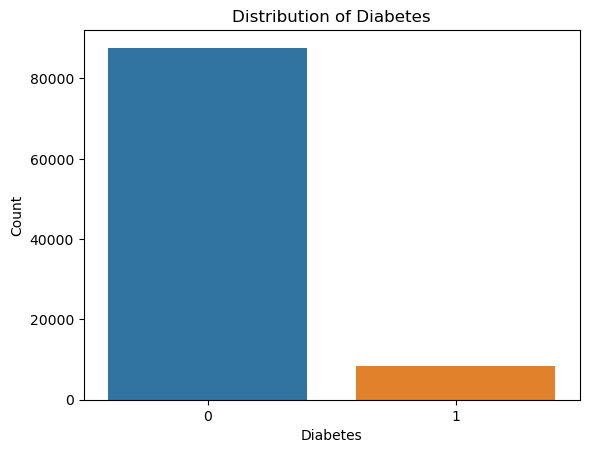

In [117]:
sns.countplot(x="diabetes", data=df)
plt.title("Distribution of Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

Based on the chart, we can conclude that in the dataset there are more patients without diabetes.

### Count plot for categorical features

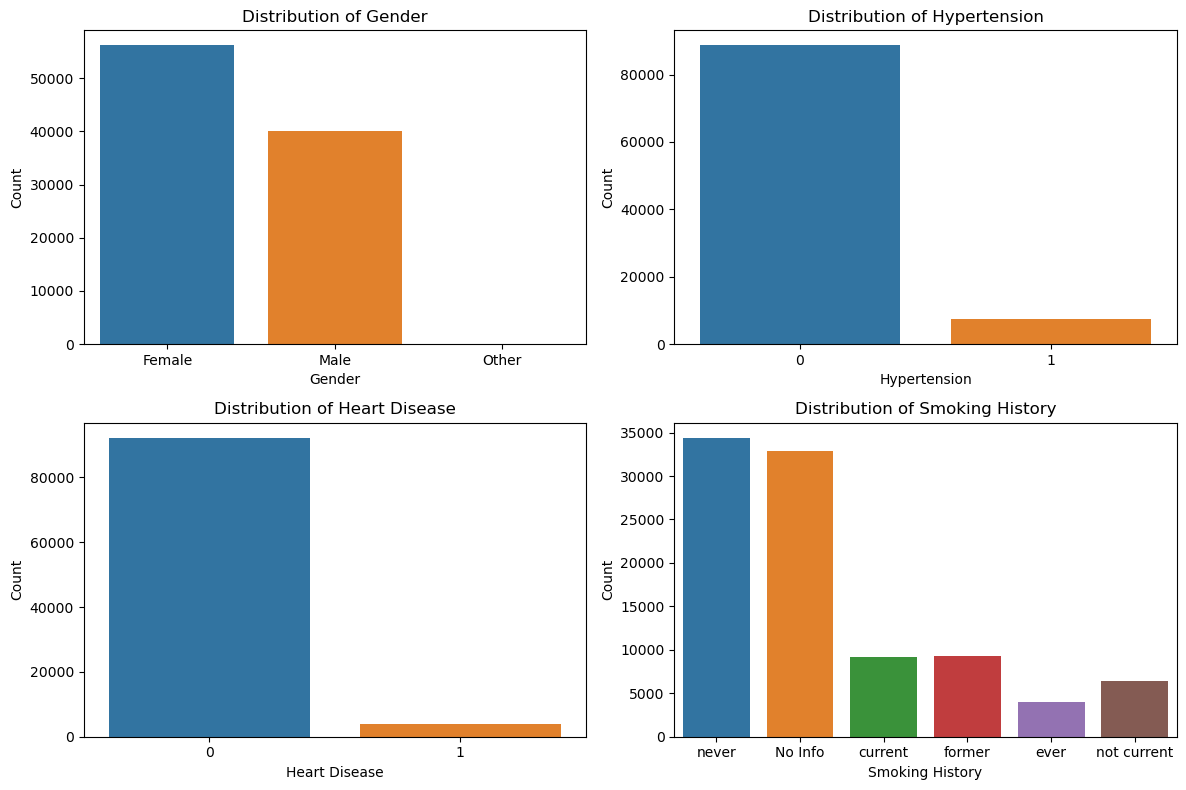

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution of gender
sns.countplot(x="gender", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

# Distribution of hypertension
sns.countplot(x="hypertension", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

# Distribution of heart disease
sns.countplot(x="heart_disease", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Count")

# Distribution of smoking history
sns.countplot(x="smoking_history", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Histogram for numerical features

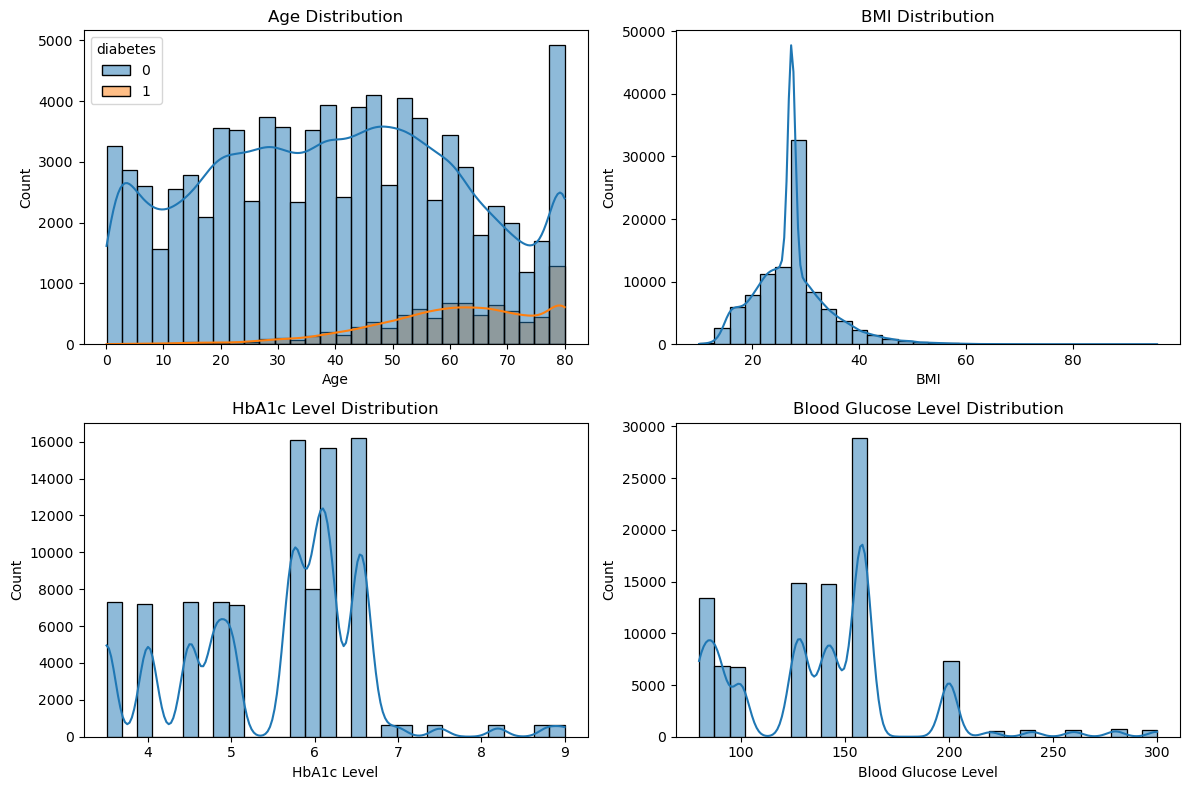

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution of age
sns.histplot(data=df, x='age', bins=30, kde=True, ax=axes[0, 0], hue='diabetes')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

# Distribution of bmi
sns.histplot(data=df, x='bmi', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("BMI Distribution")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Count")

# Distribution of HbA1c_level
sns.histplot(data=df, x='HbA1c_level', bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("HbA1c Level Distribution")
axes[1, 0].set_xlabel("HbA1c Level")
axes[1, 0].set_ylabel("Count")

# Distribution of blood glucose level
sns.histplot(data=df, x='blood_glucose_level', bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Blood Glucose Level Distribution")
axes[1, 1].set_xlabel("Blood Glucose Level")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Hypertension vs Age and Heart Disease vs Age

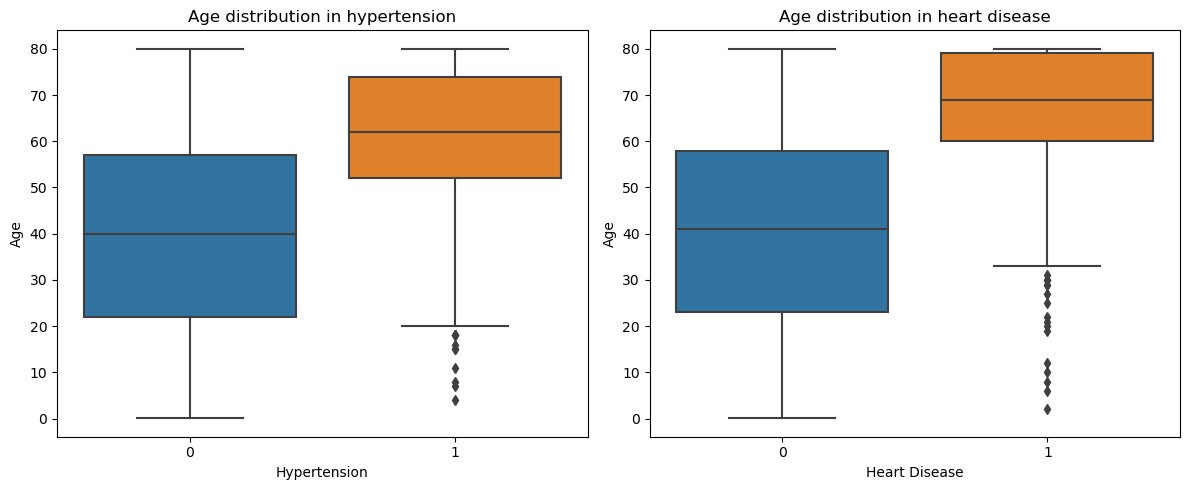

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Box plot Hypertension vs Age
sns.boxplot(data=df, x='hypertension', y='age', ax=axes[0])
axes[0].set_title("Age distribution in hypertension")
axes[0].set_xlabel("Hypertension")
axes[0].set_ylabel("Age")

# Box plot Heart Disease vs Age
sns.boxplot(data=df, x='heart_disease', y='age', ax=axes[1])
axes[1].set_title("Age distribution in heart disease")
axes[1].set_xlabel("Heart Disease")
axes[1].set_ylabel("Age")

plt.tight_layout()
plt.show()

The lowest value for hypertension is 20 years (excluding outliers), but we can also see that the average is above 60 years and the 1st quartile is slightly above 50, so older people are more likely to have hypertension.

The same for hypertension is repeated for heart disease, but with an even more advanced age group.

### Diabetes vs HbA1c_level and Diabetes vs Blood glucose level

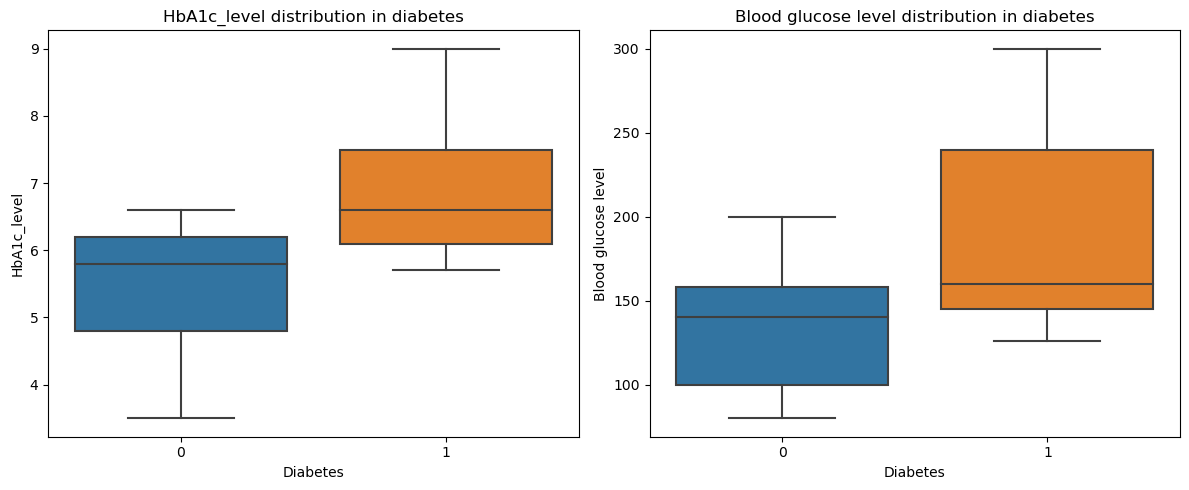

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Diabetes vs HbA1c_level
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', ax=axes[0])
axes[0].set_title("HbA1c_level distribution in diabetes")
axes[0].set_xlabel("Diabetes")
axes[0].set_ylabel("HbA1c_level")

# Diabetes vs Blood glucose level
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', ax=axes[1])
axes[1].set_title("Blood glucose level distribution in diabetes")
axes[1].set_xlabel("Diabetes")
axes[1].set_ylabel("Blood glucose level")

plt.tight_layout()
plt.show()

We can see that patients with diabetes have higher blood glucose level and higher blood hemoglobin A1c level as well.

## Preprocessing

In [122]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [123]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [124]:
df=df[df['gender']!='Other'] # Drop rows where gender is 'Other'

In [125]:
df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [126]:
# Recategorize smoking_status
new_categories = {"never": "no", "No Info": "no", "current": "yes", "ever": "yes", "former": "ex", "not current": "ex"}
df.loc[:, 'smoking_history'] = df['smoking_history'].map(new_categories)

In [127]:
# Grouping by bmi 
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Under', 'normal', 'Over', 'Obese']

df['bmi'] = pd.cut(df['bmi'], bins=bins, labels=labels)

In [128]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,no,Over,6.6,140,0
1,Female,54.0,0,0,no,Over,6.6,80,0
2,Male,28.0,0,0,no,Over,5.7,158,0
3,Female,36.0,0,0,yes,normal,5.0,155,0
4,Male,76.0,1,1,yes,normal,4.8,155,0
5,Female,20.0,0,0,no,Over,6.6,85,0
6,Female,44.0,0,0,no,normal,6.5,200,1
7,Female,79.0,0,0,no,normal,5.7,85,0
8,Male,42.0,0,0,no,Obese,4.8,145,0
9,Female,32.0,0,0,no,Over,5.0,100,0


In [129]:
# One-Hot-encoding in features categorical features
df = pd.get_dummies(df, columns=['gender', 'bmi', 'smoking_history'], prefix=['gender', 'bmi', 'smoking_history']).astype(int)

In [131]:
# Normalization of numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_normalize = ['age', 'HbA1c_level', 'blood_glucose_level']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [132]:
df.head(10)

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,bmi_Under,bmi_normal,bmi_Over,bmi_Obese,smoking_history_ex,smoking_history_no,smoking_history_yes
0,1.699722,0,1,0.781423,0.043558,0,1,0,0,0,1,0,0,1,0
1,0.543266,0,0,0.781423,-1.423041,0,1,0,0,0,1,0,0,1,0
2,-0.613191,0,0,-0.124415,0.483538,0,0,1,0,0,1,0,0,1,0
3,-0.257358,0,0,-0.124415,0.410208,0,1,0,0,1,0,0,0,0,1
4,1.521805,1,1,-1.030254,0.410208,0,0,1,0,1,0,0,0,0,1
5,-0.969023,0,0,0.781423,-1.300824,0,1,0,0,0,1,0,0,1,0
6,0.098475,0,0,0.781423,1.510157,1,1,0,0,1,0,0,0,1,0
7,1.655243,0,0,-0.124415,-1.300824,0,1,0,0,1,0,0,0,1,0
8,0.009516,0,0,-1.030254,0.165775,0,0,1,0,0,0,1,0,1,0
9,-0.435274,0,0,-0.124415,-0.934175,0,1,0,0,0,1,0,0,1,0


### Model Creation

In [133]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [138]:
knn=KNeighborsClassifier()
gnb=GaussianNB()
svc = SVC()
abc=AdaBoostClassifier()
dtc = DecisionTreeClassifier(max_depth=10)
gbdt=GradientBoostingClassifier()
rfc=RandomForestClassifier()
lrc=LogisticRegression()

In [146]:
models = {
    'KNN': knn,
    'Naive Bayes': gnb,
    'SVC': svc,    
    'Adaboost': abc,
    'Decision Tree': dtc,
    'Gradient Boosting': gbdt,
    'Random Forest': rfc,
    'Logistic Regression': lrc, }

In [147]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, conf_matrix

In [148]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [149]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
    current_accuracy, current_precision, current_conf_matrix = train_classifier(model, X_train, y_train, X_test, y_test)
    rounded_accuracy = round(current_accuracy, 2)
    rounded_precision = round(current_precision, 2)
    
    print()
    print("For: ", name)
    print(" Accuracy: ", rounded_accuracy)
    print(" Precision: ", rounded_precision)
    
    accuracy_scores.append(rounded_accuracy)
    precision_scores.append(rounded_precision)


For:  KNN
 Accuracy:  0.96
 Precision:  0.88

For:  Naive Bayes
 Accuracy:  0.89
 Precision:  0.42

For:  SVC
 Accuracy:  0.96
 Precision:  1.0

For:  Adaboost
 Accuracy:  0.96
 Precision:  0.96

For:  Decision Tree
 Accuracy:  0.96
 Precision:  0.97

For:  Gradient Boosting
 Accuracy:  0.96
 Precision:  0.98

For:  Random Forest
 Accuracy:  0.96
 Precision:  0.81

For:  Logistic Regression
 Accuracy:  0.95
 Precision:  0.86


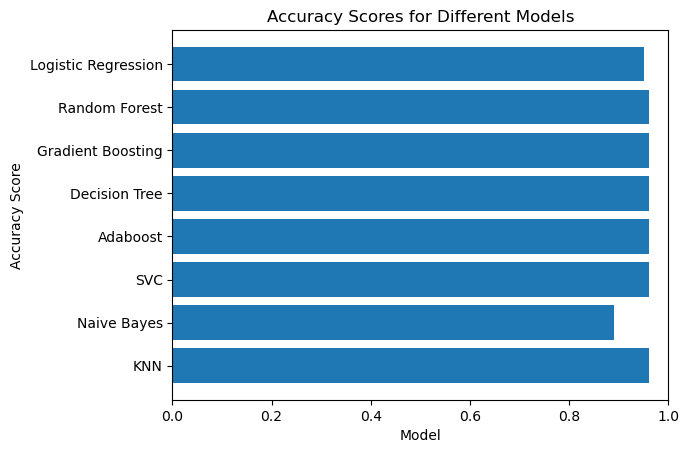

In [178]:
models_names = list(models.keys())

plt.barh(models_names, accuracy_scores)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Models')
plt.xlim(0, 1) 
    
plt.show()


From the above plot we can observe that most of the models returned with high accuracy and precision.

### Feature importance

In [187]:
dt_feature_importance = dtc.feature_importances_
gb_feature_importance = gbdt.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'DT_Importance': dt_feature_importance,
    'GB_Importance': gb_feature_importance,
})

feature_importance_df['Mean_Importance'] = ( feature_importance_df['DT_Importance'] + feature_importance_df['GB_Importance'])/2
feature_importance_df = feature_importance_df.sort_values(by='Mean_Importance', ascending=False)

print(feature_importance_df)

                Feature  DT_Importance  GB_Importance  Mean_Importance
4   blood_glucose_level       0.569512       0.564841         0.567177
3           HbA1c_level       0.379737       0.382038         0.380887
0                   age       0.022866       0.034793         0.028829
10            bmi_Obese       0.013017       0.007782         0.010399
1          hypertension       0.006097       0.005849         0.005973
2         heart_disease       0.007508       0.004052         0.005780
5         gender_Female       0.000284       0.000179         0.000232
6           gender_Male       0.000274       0.000106         0.000190
8            bmi_normal       0.000237       0.000076         0.000156
13  smoking_history_yes       0.000211       0.000017         0.000114
11   smoking_history_ex       0.000193       0.000009         0.000101
12   smoking_history_no       0.000057       0.000138         0.000097
9              bmi_Over       0.000008       0.000106         0.000057
7     

We can see that the most relevant features for the models are: HbA1c_level, blood_glucose_level, bmi_Obese along with age of the person.